In [1]:
import pandas as pd
import numpy as np
import time
import normet as nm
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig

In [2]:
df1=pd.read_csv(r'data/MY1_data.csv',parse_dates=['date'],index_col='date')

In [3]:
df1

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


# AutoML-based weather normalisation

In [4]:
df1a=nm.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [5]:
automl=nm.train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

2024-08-19 21:06:40 : Training AutoML...
2024-08-19 21:08:07 : Best model is lgbm with best model parameters of {'n_estimators': 4779, 'num_leaves': 37, 'min_child_samples': 13, 'learning_rate': 0.05353325544814332, 'log_max_bin': 10, 'colsample_bytree': 0.7006661480744041, 'reg_alpha': 3.4963871783049667, 'reg_lambda': 0.12148015741620988}


In [6]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: lgbm
Best model parameters: {'n_estimators': 4779, 'num_leaves': 37, 'min_child_samples': 13, 'learning_rate': 0.05353325544814332, 'log_max_bin': 10, 'colsample_bytree': 0.7006661480744041, 'reg_alpha': 3.4963871783049667, 'reg_lambda': 0.12148015741620988}


In [7]:
automl.best_result

{'pred_time': 2.1109122112705117e-05,
 'wall_clock_time': 83.23131108283997,
 'metric_for_logging': {'pred_time': 2.1109122112705117e-05},
 'val_loss': 0.12892923521002864,
 'training_iteration': 1,
 'config': {'n_estimators': 4779,
  'num_leaves': 37,
  'min_child_samples': 13,
  'learning_rate': 0.05353325544814332,
  'log_max_bin': 10,
  'colsample_bytree': 0.7006661480744041,
  'reg_alpha': 3.4963871783049667,
  'reg_lambda': 0.12148015741620988},
 'config/n_estimators': 4779,
 'config/num_leaves': 37,
 'config/min_child_samples': 13,
 'config/learning_rate': 0.05353325544814332,
 'config/log_max_bin': 10,
 'config/colsample_bytree': 0.7006661480744041,
 'config/reg_alpha': 3.4963871783049667,
 'config/reg_lambda': 0.12148015741620988,
 'experiment_tag': 'exp',
 'time_total_s': 11.2464439868927}

In [8]:
automl.feature_importances_

array([ 993, 6549, 6934, 5345, 5295, 6633, 6315, 4237, 6126, 3377, 6176,
       4652, 1062, 3878], dtype=int32)

In [9]:
automl.feature_names_in_

['weekday',
 'u10',
 'v10',
 'd2m',
 't2m',
 'blh',
 'sp',
 'ssrd',
 'tcc',
 'tp',
 'rh2m',
 'date_unix',
 'day_julian',
 'hour']

In [10]:
mod_stats=nm.modStats(df1a,automl)

In [11]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,4780,0.987238,-0.000007,0.268328,-7.437997e-07,0.029447,0.351283,0.999110,***,0.950987,0.975494,0.998222,training
1,1593,0.907721,0.090223,1.920277,9.806910e-03,0.208727,2.699133,0.940890,***,0.650259,0.825129,0.885274,testing
2,6373,0.967362,0.022547,0.681250,2.468418e-03,0.074582,1.383329,0.985535,***,0.875668,0.937834,0.971279,all


In [12]:
df1a

,rowid,tcc,u10,ssrd,t2m,blh,d2m,tp,rh2m,v10,sp,date,value,date_unix,day_julian,weekday,hour,set
0,0,0.650958,-2.720528,-1.164153e-10,278.394725,384.209053,277.183465,0.000008,91.884130,1.545010,102252.303312,2020-01-01 00:00:00,58.1,1.577837e+09,1,3,0,training
1,1,0.603699,-2.308789,-1.164153e-10,277.772899,353.220263,276.695430,0.000002,92.715877,1.282742,102211.168636,2020-01-01 01:00:00,43.2,1.577840e+09,1,3,1,training
2,2,0.710378,-2.216471,-1.164153e-10,277.463419,255.911846,276.505662,0.000005,93.485560,0.758730,102174.855967,2020-01-01 02:00:00,43.0,1.577844e+09,1,3,2,testing
3,3,0.837765,-1.928623,-1.164153e-10,277.305813,191.375560,276.412816,0.000005,93.906363,0.509013,102166.786485,2020-01-01 03:00:00,42.8,1.577848e+09,1,3,3,training
4,4,0.819103,-1.700043,-1.164153e-10,277.478941,151.780210,276.553051,0.000003,93.696878,0.607069,102142.578039,2020-01-01 04:00:00,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,0.918149,1.380939,-5.820766e-11,273.557442,476.945688,272.197565,0.000000,90.582979,-1.945195,99902.506413,2020-12-31 19:00:00,11.7,1.609441e+09,366,4,19,training
6369,6369,0.839639,0.987925,-5.820766e-11,273.629146,486.665851,272.171041,0.000000,89.939908,-2.102732,99947.625909,2020-12-31 20:00:00,11.0,1.609445e+09,366,4,20,training
6370,6370,0.739354,0.681543,-5.820766e-11,273.470592,489.355002,272.087408,0.000000,90.422188,-1.933668,100000.215520,2020-12-31 21:00:00,15.3,1.609448e+09,366,4,21,testing
6371,6371,0.643753,1.020793,-5.820766e-11,272.926062,40.714872,272.235319,0.000000,95.088677,-0.583816,100042.844978,2020-12-31 22:00:00,17.1,1.609452e+09,366,4,22,training


In [13]:
start_time = time.time()
df_dew1=nm.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-08-19 21:08:07 : Normalising the dataset using the trained model in parallel.
2024-08-19 21:09:03 : Aggregating 300 predictions...
Execution time: 56.20 seconds


In [14]:
df_dew1.head()

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,24.527884
2020-01-01 01:00:00,43.2,23.938926
2020-01-01 02:00:00,43.0,23.023169
2020-01-01 03:00:00,42.8,22.679957
2020-01-01 04:00:00,36.8,22.201272


In [15]:
start_time = time.time()
df_dew=nm.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=False)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-08-19 21:09:04 : Normalising the dataset using the trained model in parallel.
2024-08-19 21:09:57 : Concatenated 300 predictions...
Execution time: 53.39 seconds


In [16]:
df_dew.head()

,observed,3654,5434,11323,12849,12939,16589,17657,18205,21582,...,977967,978147,979812,980024,980276,981796,983486,993973,996392,996615
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,17.358390,17.415253,20.365358,15.502623,35.571698,19.772757,34.762076,15.842685,17.574589,...,18.557051,14.240786,17.221536,33.572124,36.508993,35.667735,13.661270,23.059575,29.091228,19.519919
2020-01-01 01:00:00,43.2,11.650487,25.983434,25.653356,30.650889,39.520891,19.961378,15.508219,11.616294,29.896673,...,21.724182,31.065289,32.937436,19.495302,22.080987,26.510613,20.718002,12.354462,31.763069,24.686171
2020-01-01 02:00:00,43.0,13.951243,27.395424,14.245678,21.371025,24.220953,13.531378,16.155243,16.385554,43.458396,...,25.449611,25.984685,24.423807,28.349490,21.317359,25.694227,13.438262,24.269464,26.216867,30.720698
2020-01-01 03:00:00,42.8,14.868562,27.950450,25.676622,12.000473,33.141686,16.708160,22.756579,14.460714,25.060937,...,23.397695,40.665844,23.372347,15.294311,40.789473,13.935548,33.328153,22.503625,25.776540,36.129794
2020-01-01 04:00:00,36.8,19.394702,14.736609,16.808268,13.462741,14.664861,34.265314,15.499070,14.282653,13.545740,...,20.699621,20.759223,26.478917,13.312075,14.052993,26.924848,23.789786,24.736169,15.513161,13.103977


In [17]:
weather_df=df1.reset_index().iloc[0:100][['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m']]

In [18]:
weather_df.head()

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m
0,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130
1,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877
2,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560
3,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363
4,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878


In [19]:
start_time = time.time()
df_dew2=nm.normalise(df1a, automl, weather_df=weather_df,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-08-19 21:09:57 : Normalising the dataset using the trained model in parallel.
2024-08-19 21:10:48 : Aggregating 300 predictions...
Execution time: 51.50 seconds


<Axes: xlabel='date'>

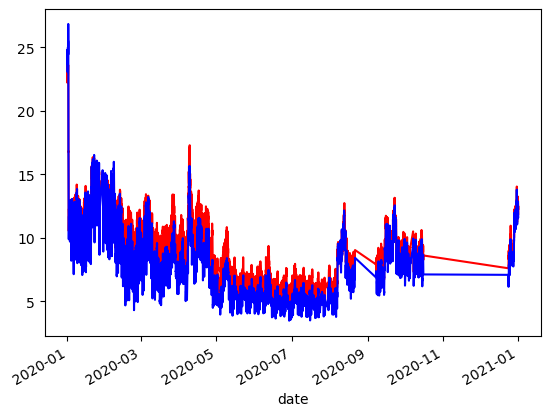

In [20]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')

In [21]:
model_config={
    'time_budget': 60,  # Total running time in seconds
    'metric': 'r2', #
}

In [22]:
df1a.columns

Index(['rowid', 'tcc', 'u10', 'ssrd', 't2m', 'blh', 'd2m', 'tp', 'rh2m', 'v10',
       'sp', 'date', 'value', 'date_unix', 'day_julian', 'weekday', 'hour',
       'set'],
      dtype='object')

In [23]:
df_dew, mod_stats=nm.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-08-19 21:10:49 : Training AutoML...
2024-08-19 21:11:48 : Best model is lgbm with best model parameters of {'n_estimators': 515, 'num_leaves': 21, 'min_child_samples': 13, 'learning_rate': 0.14027049292611726, 'log_max_bin': 9, 'colsample_bytree': 0.5618562156824052, 'reg_alpha': 6.241907638433782, 'reg_lambda': 0.024371156445369874}
2024-08-19 21:11:48 : Normalising the dataset using the trained model in parallel.
2024-08-19 21:11:50 : Aggregating 100 predictions...


In [24]:
df_dew, mod_stats=nm.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-08-19 21:11:51 : Normalising the dataset using the trained model in parallel.
2024-08-19 21:12:09 : Aggregating 100 predictions...


In [25]:
#Resampling from given dataset
df_dew, mod_stats=nm.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],weather_df=weather_df,model_config=model_config,n_samples=100)

2024-08-19 21:12:10 : Normalising the dataset using the trained model in parallel.
2024-08-19 21:12:28 : Aggregating 100 predictions...


In [26]:
df_dew, mod_stats=nm.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-08-19 21:14:04 : Progress: 20.00% (Model 1/5)... ETA: 6.34 minutes
2024-08-19 21:16:18 : Progress: 40.00% (Model 2/5)... ETA: 5.73 minutes
2024-08-19 21:18:23 : Progress: 60.00% (Model 3/5)... ETA: 3.94 minutes
2024-08-19 21:20:40 : Progress: 80.00% (Model 4/5)... ETA: 2.05 minutes
2024-08-19 21:22:21 : Progress: 100.00% (Model 5/5)... ETA: 0.00 seconds


# Time series decomposition

In [27]:
df_dewca, mod_stats=nm.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-08-19 21:22:21 : Training AutoML...
2024-08-19 21:23:54 : Best model is lgbm with best model parameters of {'n_estimators': 4779, 'num_leaves': 37, 'min_child_samples': 13, 'learning_rate': 0.05353325544814332, 'log_max_bin': 10, 'colsample_bytree': 0.7006661480744041, 'reg_alpha': 3.4963871783049667, 'reg_lambda': 0.12148015741620988}
2024-08-19 21:23:54 : Subtracting base...
2024-08-19 21:24:49 : Subtracting date_unix... ETA: 3.62 minutes
2024-08-19 21:25:44 : Subtracting day_julian... ETA: 2.75 minutes
2024-08-19 21:26:41 : Subtracting weekday... ETA: 1.85 minutes
2024-08-19 21:27:35 : Subtracting hour... ETA: 55.24 seconds


In [28]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.768833,18.759373,3.731552,0.928564,0.498945,24.527884,0.609451
2020-01-01 01:00:00,43.2,9.318801,19.049097,3.780460,0.934992,0.014957,23.938926,0.159419
2020-01-01 02:00:00,43.0,8.953781,18.913268,3.720517,0.848927,-0.253941,23.023169,-0.205602
2020-01-01 03:00:00,42.8,9.124189,18.599279,3.628079,0.860719,-0.372927,22.679957,-0.035194
2020-01-01 04:00:00,36.8,8.170957,18.951837,3.677635,0.913626,-0.353400,22.201272,-0.988425
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.090931,12.106645,0.542904,-0.133077,0.332584,12.780605,-0.068452
2020-12-31 20:00:00,11.0,8.730712,12.127568,0.576599,-0.141387,0.122508,12.256618,-0.428670
2020-12-31 21:00:00,15.3,8.371738,12.436463,0.610127,-0.083752,0.043947,12.219141,-0.787645


In [29]:
df_dewca, mod_stats=nm.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-08-19 21:28:29 : Subtracting base...
2024-08-19 21:29:23 : Subtracting date_unix... ETA: 3.61 minutes
2024-08-19 21:30:17 : Subtracting day_julian... ETA: 2.70 minutes
2024-08-19 21:31:11 : Subtracting weekday... ETA: 1.79 minutes
2024-08-19 21:32:04 : Subtracting hour... ETA: 53.81 seconds


In [30]:
df_dewcb, mod_stats=nm.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-08-19 21:32:58 : Training AutoML...
2024-08-19 21:34:32 : Best model is lgbm with best model parameters of {'n_estimators': 4779, 'num_leaves': 37, 'min_child_samples': 13, 'learning_rate': 0.05353325544814332, 'log_max_bin': 10, 'colsample_bytree': 0.7006661480744041, 'reg_alpha': 3.4963871783049667, 'reg_lambda': 0.12148015741620988}
2024-08-19 21:34:32 : Subtracting deweathered...
2024-08-19 21:35:25 : Subtracting v10... ETA: 8.91 minutes
2024-08-19 21:36:19 : Subtracting blh... ETA: 8.06 minutes
2024-08-19 21:37:12 : Subtracting u10... ETA: 7.12 minutes
2024-08-19 21:38:04 : Subtracting sp... ETA: 6.20 minutes
2024-08-19 21:38:56 : Subtracting rh2m... ETA: 5.29 minutes
2024-08-19 21:39:48 : Subtracting tcc... ETA: 4.39 minutes
2024-08-19 21:40:40 : Subtracting d2m... ETA: 3.51 minutes
2024-08-19 21:41:33 : Subtracting t2m... ETA: 2.63 minutes
2024-08-19 21:42:24 : Subtracting ssrd... ETA: 1.75 minutes
2024-08-19 21:43:15 : Subtracting tp... ETA: 52.36 seconds


In [31]:
df_dewcb, mod_stats=nm.decom_met(df1a, model=automl, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-08-19 21:44:06 : Subtracting deweathered...
2024-08-19 21:45:01 : Subtracting v10... ETA: 9.13 minutes
2024-08-19 21:45:56 : Subtracting blh... ETA: 8.19 minutes
2024-08-19 21:46:50 : Subtracting u10... ETA: 7.26 minutes
2024-08-19 21:47:44 : Subtracting sp... ETA: 6.33 minutes
2024-08-19 21:48:37 : Subtracting rh2m... ETA: 5.41 minutes
2024-08-19 21:49:30 : Subtracting tcc... ETA: 4.49 minutes
2024-08-19 21:50:22 : Subtracting d2m... ETA: 3.58 minutes
2024-08-19 21:51:14 : Subtracting t2m... ETA: 2.68 minutes
2024-08-19 21:52:06 : Subtracting ssrd... ETA: 1.78 minutes
2024-08-19 21:52:57 : Subtracting tp... ETA: 53.08 seconds


In [32]:
df_dewcb

,observed,deweathered,v10,blh,u10,sp,rh2m,tcc,d2m,t2m,ssrd,tp,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,24.527884,2.460197,1.972355,10.127828,14.338106,6.455974,4.994595,4.229797,5.255833,4.834211,5.415028,1.596199
2020-01-01 01:00:00,43.2,23.938926,1.965884,4.198821,11.130656,10.582924,1.773888,1.295460,1.948446,2.232257,1.558190,1.882033,-0.930420
2020-01-01 02:00:00,43.0,23.023169,1.700015,7.162572,13.014270,8.338533,1.443310,1.833198,2.381214,0.863527,-0.127221,2.171610,-0.392609
2020-01-01 03:00:00,42.8,22.679957,1.645358,10.230334,12.400900,4.988385,1.985827,2.259276,2.039301,0.666952,0.244376,1.709099,0.265997
2020-01-01 04:00:00,36.8,22.201272,1.728454,8.701090,9.574778,3.260666,1.652540,2.500674,2.326699,0.432573,-0.457088,1.553239,-1.849514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,12.780605,0.285082,-0.332331,-0.466939,0.831082,0.609736,-0.382668,-0.177525,-0.577193,-1.459071,-0.584970,-0.034524
2020-12-31 20:00:00,11.0,12.256618,-0.043219,-0.265365,0.026853,1.045377,0.806664,-0.361092,-0.398905,-1.168165,-1.607897,-0.363184,-0.144190
2020-12-31 21:00:00,15.3,12.219141,0.271544,-0.248022,-0.771355,0.585887,0.798205,-0.216856,-0.027537,-0.688194,-1.357657,-0.354380,4.002425


In [33]:
df_dewca, mod_stats=nm.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-08-19 21:53:49 : Subtracting base...
2024-08-19 21:54:44 : Subtracting date_unix... ETA: 3.72 minutes
2024-08-19 21:55:40 : Subtracting day_julian... ETA: 2.78 minutes
2024-08-19 21:56:35 : Subtracting weekday... ETA: 1.85 minutes
2024-08-19 21:57:30 : Subtracting hour... ETA: 55.39 seconds


In [34]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.768833,18.759373,3.731552,0.928564,0.498945,24.527884,0.609451
2020-01-01 01:00:00,43.2,9.318801,19.049097,3.780460,0.934992,0.014957,23.938926,0.159419
2020-01-01 02:00:00,43.0,8.953781,18.913268,3.720517,0.848927,-0.253941,23.023169,-0.205602
2020-01-01 03:00:00,42.8,9.124189,18.599279,3.628079,0.860719,-0.372927,22.679957,-0.035194
2020-01-01 04:00:00,36.8,8.170957,18.951837,3.677635,0.913626,-0.353400,22.201272,-0.988425
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.090931,12.106645,0.542904,-0.133077,0.332584,12.780605,-0.068452
2020-12-31 20:00:00,11.0,8.730712,12.127568,0.576599,-0.141387,0.122508,12.256618,-0.428670
2020-12-31 21:00:00,15.3,8.371738,12.436463,0.610127,-0.083752,0.043947,12.219141,-0.787645


# Rolling weather normalisation

In [35]:
df_dewc1, mod_stats=nm.rolling(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rolling_every=7)

2024-08-19 21:58:30: Rolling window 0 from 2020-01-01 to 2020-01-15
2024-08-19 21:59:20: Rolling window 10 from 2020-03-13 to 2020-03-27
2024-08-19 22:00:09: Rolling window 20 from 2020-05-22 to 2020-06-05
2024-08-19 22:00:58: Rolling window 30 from 2020-08-02 to 2020-08-16


In [36]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_29,rolling_30,rolling_31,rolling_32,rolling_33,rolling_34,rolling_35,rolling_36,rolling_37,rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,20.325167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,19.563736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,18.145443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,19.962049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,18.728870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

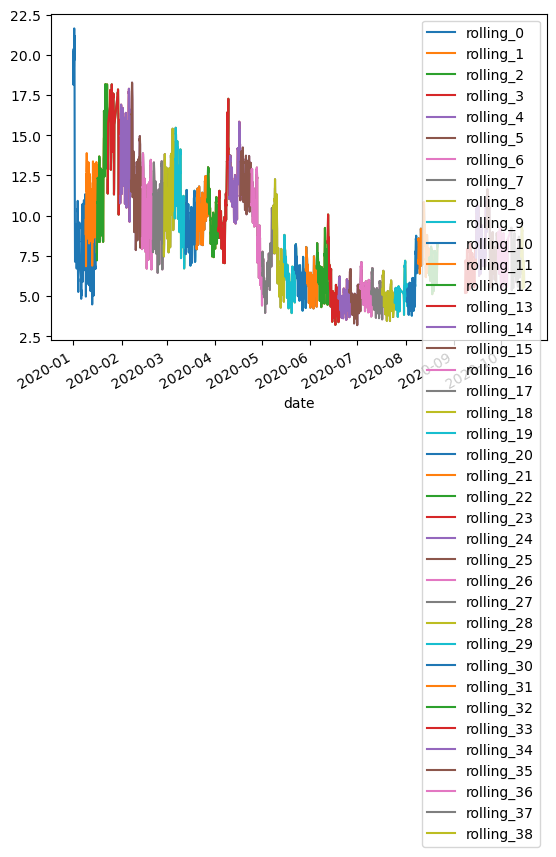

In [37]:
df_dewc1.iloc[:,1:].plot()

# Partial Dependence Plots

In [38]:
df1a=nm.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [39]:
df1a

,rowid,tcc,u10,ssrd,t2m,blh,d2m,tp,rh2m,v10,sp,date,value,date_unix,day_julian,weekday,hour,set
0,0,0.650958,-2.720528,-1.164153e-10,278.394725,384.209053,277.183465,0.000008,91.884130,1.545010,102252.303312,2020-01-01 00:00:00,58.1,1.577837e+09,1,3,0,training
1,1,0.603699,-2.308789,-1.164153e-10,277.772899,353.220263,276.695430,0.000002,92.715877,1.282742,102211.168636,2020-01-01 01:00:00,43.2,1.577840e+09,1,3,1,training
2,2,0.710378,-2.216471,-1.164153e-10,277.463419,255.911846,276.505662,0.000005,93.485560,0.758730,102174.855967,2020-01-01 02:00:00,43.0,1.577844e+09,1,3,2,testing
3,3,0.837765,-1.928623,-1.164153e-10,277.305813,191.375560,276.412816,0.000005,93.906363,0.509013,102166.786485,2020-01-01 03:00:00,42.8,1.577848e+09,1,3,3,training
4,4,0.819103,-1.700043,-1.164153e-10,277.478941,151.780210,276.553051,0.000003,93.696878,0.607069,102142.578039,2020-01-01 04:00:00,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,0.918149,1.380939,-5.820766e-11,273.557442,476.945688,272.197565,0.000000,90.582979,-1.945195,99902.506413,2020-12-31 19:00:00,11.7,1.609441e+09,366,4,19,training
6369,6369,0.839639,0.987925,-5.820766e-11,273.629146,486.665851,272.171041,0.000000,89.939908,-2.102732,99947.625909,2020-12-31 20:00:00,11.0,1.609445e+09,366,4,20,training
6370,6370,0.739354,0.681543,-5.820766e-11,273.470592,489.355002,272.087408,0.000000,90.422188,-1.933668,100000.215520,2020-12-31 21:00:00,15.3,1.609448e+09,366,4,21,testing
6371,6371,0.643753,1.020793,-5.820766e-11,272.926062,40.714872,272.235319,0.000000,95.088677,-0.583816,100042.844978,2020-12-31 22:00:00,17.1,1.609452e+09,366,4,22,training


In [40]:
automl.feature_names_in_

['weekday',
 'u10',
 'v10',
 'd2m',
 't2m',
 'blh',
 'sp',
 'ssrd',
 'tcc',
 'tp',
 'rh2m',
 'date_unix',
 'day_julian',
 'hour']

In [41]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=nm.pdp(df1a,automl,variables=['blh'])

In [42]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,blh,73.415911,15.742461,8.358786
1,blh,88.917320,15.359839,8.271418
2,blh,104.418730,14.966788,8.354652
3,blh,119.920140,15.582338,8.428540
4,blh,135.421549,13.699515,7.471944
...,...,...,...,...
95,blh,1546.049822,6.940856,4.955734
96,blh,1561.551231,6.955089,4.957737
97,blh,1577.052641,6.960697,4.952725
98,blh,1592.554051,7.132266,4.943666


In [43]:
pdp_value=nm.pdp(df1a,automl,variables=['blh','t2m'])

In [44]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,blh,73.415911,15.742461,8.358786
1,blh,88.917320,15.359839,8.271418
2,blh,104.418730,14.966788,8.354652
3,blh,119.920140,15.582338,8.428540
4,blh,135.421549,13.699515,7.471944
...,...,...,...,...
195,t2m,294.518468,10.544835,7.865555
196,t2m,294.715875,10.532480,7.856032
197,t2m,294.913281,10.565610,7.847180
198,t2m,295.110688,10.527926,7.840150


In [45]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=nm.pdp(df1a,automl)

In [46]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,weekday,1.0,8.808568,7.348096
1,weekday,2.0,8.975131,7.397715
2,weekday,3.0,9.519126,7.803357
3,weekday,4.0,9.178989,7.852847
4,weekday,5.0,9.756207,7.741670
...,...,...,...,...
1226,hour,19.0,9.648269,7.468077
1227,hour,20.0,9.583308,7.474737
1228,hour,21.0,9.275591,7.467640
1229,hour,22.0,9.089483,7.493595
